
 # 1.Расчет газонасыщенности пластовой нефти $G_0$
### Газонасыщенность пластовой нефти  $G_0$, $\frac{м^3}{м^3} = \frac{1}{0.00036 ρ_{нд}– 0.2896}$


Populating the interactive namespace from numpy and matplotlib
G0= 60.0 м^3/м^3


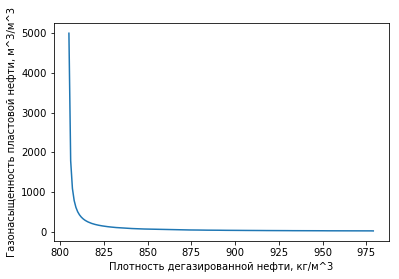

In [15]:
rho1_kgm3 = 850 #кг/м^3
import math
import numpy as np
%pylab inline
#   Расчет газонасыщенности от плотности дегазированной нефти
def g0_m3m3(rho_kgm3):
     return np.trunc(1 / (0.00036*rho_kgm3 - 0.2896))       
print ('G0=', g0_m3m3(rho1_kgm3), 'м^3/м^3') 
rho_kgm3=np.arange(805,980,1)
plt.xlabel(u'Плотность дегазированной нефти, кг/м^3')
plt.ylabel(u'Газонасыщенность пластовой нефти, м^3/м^3')
plot(rho_kgm3,g0_m3m3(rho_kgm3))
show()

# 2.Расчет давления насыщения ${Р_{нас}}$
 для интервала газонасыщенности $25 ≤ Gо ≤ 100$  $\frac{м^3}{м^3}$
 
$ Р_{нас} = 5,5 + 0,093·(Gо – 25) $ МПа

$ Р_{нас} = 6 + 0,22·(Gо – 40) $,справедливое в интервале $ 40 ≤ Gо ≤ 80$  $\frac{м^3}{м^3}$, полученное используя свойства нефтей месторождения Узень

In [3]:
 # 2.Расчет давления насыщения   
def p_nas_MPa(g0_m3m3):
        if (g0_m3m3 >= 25 and g0_m3m3 < 40) or (g0_m3m3 > 80 and g0_m3m3 <= 100): 
             p_nas_MPa = 5.5 + 0.093*(g0_m3m3 - 25)
        elif g0_m3m3>=40 and g0_m3m3 <= 80: 
            p_nas_MPa= 6 + 0.22*(g0_m3m3 - 40)
        else: 
            print ("Газонасыщенность не подходит")
        return p_nas_MPa
print('Рнас=',p_nas_MPa(g0_m3m3(rho1_kgm3)),"Мпа")

Рнас= 10.4 Мпа


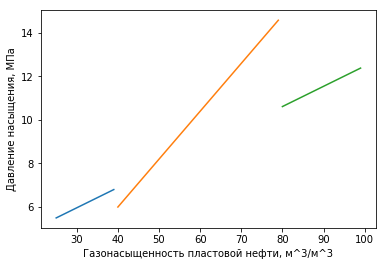

In [4]:
g01_m3m3=np.arange(25,40,1)
p_nas1_MPa = 5.5 + 0.093*(g01_m3m3 - 25)
g02_m3m3=np.arange(40,80,1)
p_nas2_MPa= 6 + 0.22*(g02_m3m3 - 40)
g03_m3m3=np.arange(80,100,1) 
p_nas3_MPa = 5.5 + 0.093*(g03_m3m3 - 25)
plt.xlabel(u'Газонасыщенность пластовой нефти, м^3/м^3')
plt.ylabel(u'Давление насыщения, МПа')
plot(g01_m3m3,p_nas1_MPa,g02_m3m3,p_nas2_MPa,g03_m3m3,p_nas3_MPa) 
show()

# 3.Расчет объемного коэффициента нефти $b$
 Используется следующая корреляционная зависимость $b = 1 + 0,003·Gо$

b= 1.18


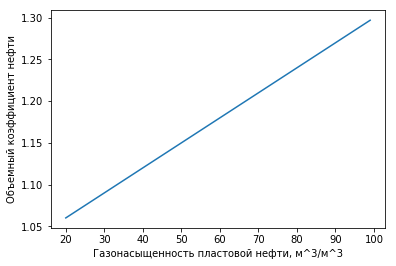

In [8]:
# 3.Расчет объемного коэффициента нефти
def b_m3m3(g0_m3m3):
    b_m3m3=1+0.003*g0_m3m3
    return b_m3m3
print('b=',b_m3m3(g0_m3m3(rho1_kgm3)))
g0_m3m3=np.arange(20,100,1)
plt.xlabel(u'Газонасыщенность пластовой нефти, м^3/м^3')
plt.ylabel(u'Объемный коэффициент нефти')
plot(g0_m3m3,b_m3m3(g0_m3m3))
show()

# 4. Расчет плотности газонасыщенной нефти $ρ_{нг} $
 расчет ведется по следующей корреляционной зависимости при $10 ≤ G_0 ≤ 100$ $\frac{м3}{м3}$ $ρ_{нг}=\frac{1090}{G_0^{0,085}}$

ρнг= 769.0 кг/м^3


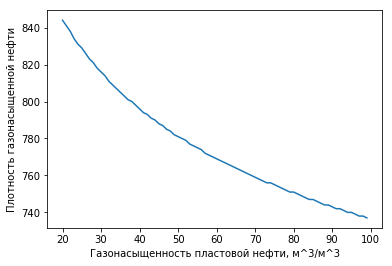

In [11]:
# Расчет плотности газонасыщенной нефти
def rhong_kgm3(g0_m3m3):
    rhong_kgm3 = np.trunc(1090/(pow(g0_m3m3,0.085)))
    return rhong_kgm3
print('ρнг=',rhong_kgm3(g0_m3m3(rho1_kgm3)),'кг/м^3' )
g0_m3m3=np.arange(20,100,1)
plt.xlabel(u'Газонасыщенность пластовой нефти, м^3/м^3')
plt.ylabel(u'Плотность газонасыщенной нефти')
plot(g0_m3m3,rhong_kgm3(g0_m3m3))
show()

# 5.Оценка плотности выделяющегося из нефти газа $ρ_г$
 Для этого можно использовать следующую аналитическую зависимость:
 ## $ρ_г = \frac{685 – 0,809·ρ_{нг}}{Gо}$

In [16]:
# Оценка плотности выделяющегося из нефти газа
def rhog_kgm3(g0_m3m3,rhong_kgm3):
    rhog_kgm3=np.trunc((685 - 0.809*rhong_kgm3) / g0_m3m3)
    return rhog_kgm3
print('ρг=',rhog_kgm3(g0_m3m3(rho1_kgm3),rhong_kgm3(g0_m3m3(rho1_kgm3))),'кг/м^3' )

ρг= 1.0 кг/м^3


# 6.Оценка содержания в выделившемся газе азота $y_а$
## $y_а = 9,9 – 8,167·ρ_г$

In [17]:
#Оценка содержания в выделившемся газе азота
def ya(rhog_kgm3):
    ya=np.trunc(9.9-8.167*rhog_kgm3)
    return ya
print('ya=',ya(rhog_kgm3(g0_m3m3(rho1_kgm3),rhong_kgm3(g0_m3m3(rho1_kgm3)))),'%' )

ya= 1.0 %


# 7.Оценка содержания в выделившемся газе метана $y_м$
## $y_м = 68,07·(1,977 - ρ_г)$   при  $2 ≤ y_м < 98,5$% $, 0 ≤ y_а < 4$ %

In [18]:
#Оценка содержания в выделившемся газе метана
def ym(rhog_kgm3):
    if 9.9-8.167*rhog_kgm3>=0 and 9.9-8.167*rhog_kgm3 <= 4 :
        ym=np.trunc(68.07*(1.977-rhog_kgm3))
    else: 
            print ("Ошибка!")
    return ym  
if ym(rhog_kgm3(g0_m3m3(rho1_kgm3),rhong_kgm3(g0_m3m3(rho1_kgm3))))<2 or ym(rhog_kgm3(g0_m3m3(rho1_kgm3),rhong_kgm3(g0_m3m3(rho1_kgm3))))>=98.5: print('Ошибка!')
print('ym=',ym(rhog_kgm3(g0_m3m3(rho1_kgm3),rhong_kgm3(g0_m3m3(rho1_kgm3)))),'%') 

ym= 66.0 %


# Методология расчета ρнд, используя величины ρнд для разных сроков
## $ρ_{нднач}$ на начало разработки = 840 $\frac{кг}{м^3}$
## $ρ_{ндтек}$ на текущую дату =850 $\frac{кг}{м^3}$
## $P_{наснач}$, начальное давление насыщения = 12 МПа
## $P_{нас}$, давление насыщения года, плотность в котором нужно рассчитать = 10 МПа
## $P_{настек}$, давление насыщения на текущую дату = 8 МПа

In [8]:
ro1 =840
ro3 = 850
P1 =12
P2 =10
P3 =8


## Сначала рассчитывается разность плотностей


In [13]:
dro=ro3-ro1
print('∆ρнд=',dro,'кг/м^3' )

∆ρнд= 10 кг/м^3


## А также разность давлений насыщения

In [9]:
dP=P1-P3
print('∆P=',dP,'МПа' )

∆P= 4 МПа


## Далее находим $\frac{∆ρ_{нд}}{∆Р_{нас}}$


In [15]:
print('∆ρнд/∆Рнас=',dro/dP,'кг/(м^3*МПа)' )

∆ρнд/∆Рнас= 2.5 кг/(м^3*МПа)


## Рассчитываем $∆Р'_{нас}=Р_{наснач}-Р_{нас}$

In [10]:
print('∆P*нас=',P1-P2,'МПа' )

∆P*нас= 2 МПа


## а также $∆ρ'_{нд}=\frac{∆ρ_{нд}}{∆Р_{нас}}·∆Р'_{нас}$


In [17]:
print('∆ρ*нд=',dro/dP*(P1-P2),'кг/м^3' )

∆ρ*нд= 5.0 кг/м^3


## Находим $ρ_{нд}=ρ_{нднач} + ∆ρ'_{нд}$

In [18]:
print('ρнд=',dro/dP*(P1-P2)+ro1,'кг/м^3' )

ρнд= 845.0 кг/м^3
